# Workshop 5 Decision trees & random forests

Interesting sources: 
- https://learn.datacamp.com/courses/machine-learning-with-tree-based-models-in-python
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- https://www.datacamp.com/community/tutorials/random-forests-classifier-python

![](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/media/overview/tdsp-lifecycle2.png "Data Science Lifecycle")

We have seen that we can uncover correlations by using bivariate analyis. This also raises the question: If we extract information from multiple columns (Multivariate analysis), could we use these correlations to calculate/predict the value of a column for rows that do not yet have a value?

For example:
- Can we calculate if a customer will churn (= We lose the customer)?
- Can we calculate if a customer would use a certain product? (Product recommendation)
- Can we calculate if a mail is spam or not?
- Can we calculate if a financial transaction is fraudulent or not?
- Can we calculate if a customer will be able to pay back their loan or not?
- Can we calculate the price people are willing to pay for a house?
- Can we calculate the salary a student will earn in the future?
- ...

Just as we used math/statistics to support to explore the data one column at a time (Univariate) and per combination of two columns (Bivariate analysis), we will use machine learning algorithms to extract information across multiple columns (Multivariate analysis) and to build data products. 

Machine learning is:
- Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention. (https://www.sas.com/en_us/insights/analytics/machine-learning.html#:~:text=Machine%20learning%20is%20a%20method,decisions%20with%20minimal%20human%20intervention.)
- Machine learning (ML) is the study of computer algorithms that improve automatically through experience.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks. (https://en.wikipedia.org/wiki/Machine_learning)

Examples of data products could include:
- A product recommender
- A customer churn predictor
- A mail labeler (Primary, promotion, social, spam, etc.)
- Sentiment analyser for social media messages
- ...

![](https://miro.medium.com/max/1204/1*qYoU2VTBsORAfhkfiluURQ.png)

In [1]:
import pandas as pd
df = pd.read_csv('data/EnergyCorp.csv', sep=';')
df.head()

,klantnr,huidig_contractduur,VERBRUIKGAS,VERBRUIKEL,VERBRUIKHOOG,VERBRUIKLAAG,nieuwsbrief,wervingskanaal,vast_variabel,grijs_groen,startlevering,eindlevering,contract_verlengd,welstand,levensfase,bouwjaar,soort_woning,inkomen,opleiding
0,10135,12,0,3047,0,0,Y,Online,vaste prijs,grijze stroom,11-10-2002,3-11-2004,niet verlengd,Laag,Alleenstaand,1940 tot 1969,Hoge flat,tussen modaal en 2 keer modaal keer modaal of ...,Midden
1,10150,12,0,0,3247,3257,Y,Online,vaste prijs,grijze stroom,11-10-2002,11-10-2005,niet verlengd,Hoog,Paar met kinderen,1970 tot 1989,Rijtjeshuis,modaal,Hoog
2,10159,12,0,2426,0,0,N,Online,vaste prijs,grijze stroom,11-10-2002,5-1-2007,niet verlengd,Midden,Paar met kinderen,Voor 1899,Rijtjeshuis,tussen modaal en 2 keer modaal,Hoog
3,10193,36,1616,2092,0,0,Y,Inbound,variabele prijs,groene stroom,17-10-2002,26-3-2012,niet verlengd,Laag,Paar met kinderen,Voor 1899,Lage flat,modaal,Laag
4,10206,12,0,2787,0,0,Y,Online,vaste prijs,groene stroom,11-10-2002,5-2-2009,niet verlengd,Hoog,Paar met kinderen,Voor 1899,Rijtjeshuis,modaal,Midden


## Feature Engineering

<Axes: xlabel='contract_verlengd'>

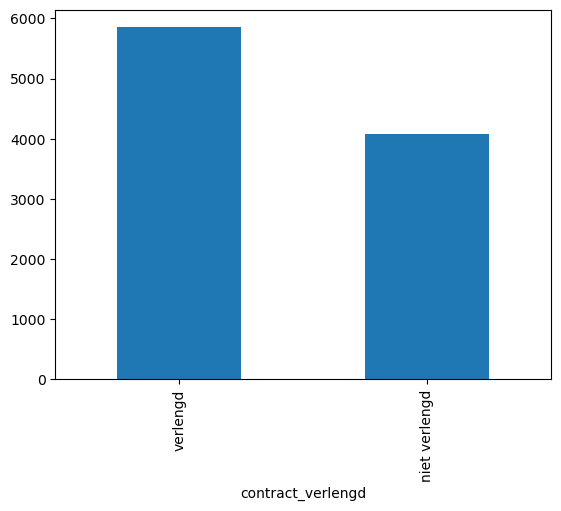

In [2]:
df['contract_verlengd'].value_counts().plot(kind='bar')

In [3]:
df['contract_verlengd'].isna().sum()

0

In [4]:
def convert_contract_verlengd(contractVerlengd):
    if(contractVerlengd == 'verlengd'):
        return 0
    else:
        return 1

In [5]:
print(convert_contract_verlengd('verlengd'))
print(convert_contract_verlengd('niet verlengd'))

0
1


In [6]:
df['churned'] = df['contract_verlengd'].apply(convert_contract_verlengd)

In [7]:
df['churned'] = df['contract_verlengd'].apply(convert_contract_verlengd)

In [8]:
df['churned'].mean()

0.4110071435758125

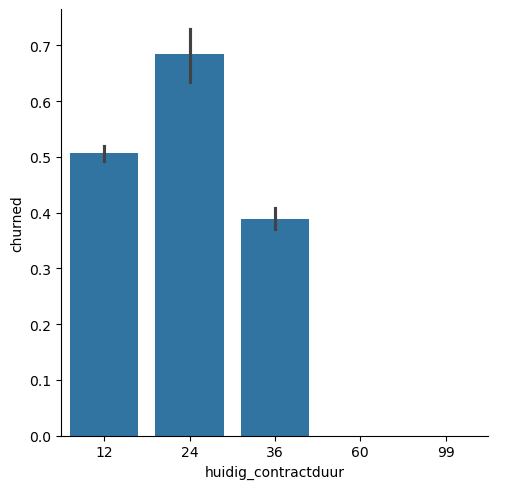

In [9]:
import seaborn as sns
sns.catplot(y="churned", x="huidig_contractduur", kind="bar", data=df);

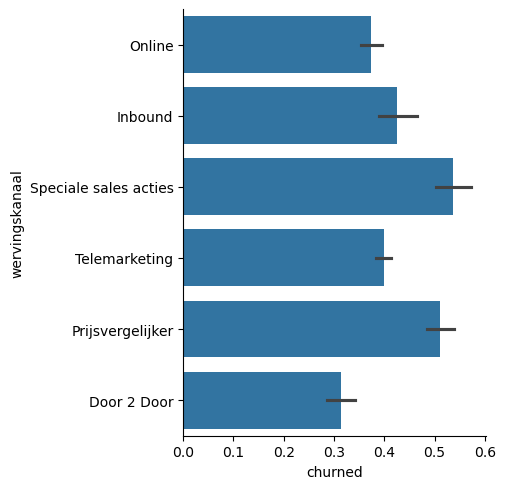

In [10]:
import seaborn as sns
sns.catplot(x="churned", y="wervingskanaal", kind="bar", data=df)

Most machine learning algorithms in Python can not handle categorical data directly. We will need to convert categorical data into numeric values. We can do so by creating **dummy variables**.

In [11]:
wervingskanaal_dummies = pd.get_dummies(df['wervingskanaal'])
wervingskanaal_dummies.head()

,Door 2 Door,Inbound,Online,Prijsvergelijker,Speciale sales acties,Telemarketing
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,True,False,False,False,False
4,False,False,True,False,False,False


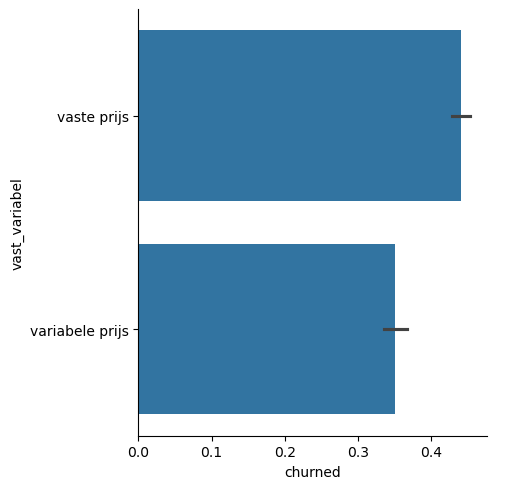

In [12]:
import seaborn as sns
sns.catplot(x="churned", y="vast_variabel", kind="bar", data=df)

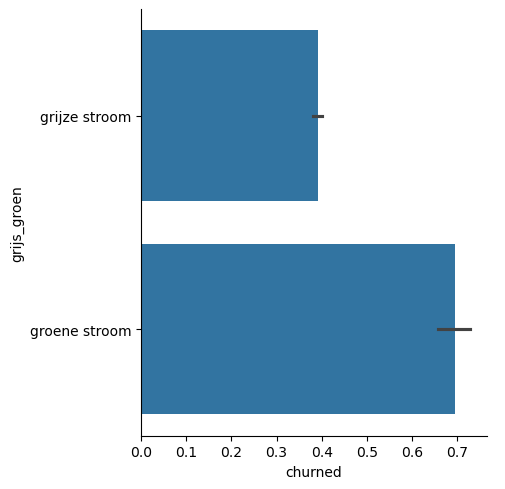

In [13]:
import seaborn as sns
sns.catplot(x="churned", y="grijs_groen", kind="bar", data=df)

In [14]:
df_prepped = df.join(wervingskanaal_dummies)
df_prepped['vaste_prijs'] = df['vast_variabel'] == 'vaste prijs'
df_prepped['groene_stroom'] = df['grijs_groen'] == 'groene stroom'

In [15]:
df_prepped.head()

,klantnr,huidig_contractduur,VERBRUIKGAS,VERBRUIKEL,VERBRUIKHOOG,VERBRUIKLAAG,nieuwsbrief,wervingskanaal,vast_variabel,grijs_groen,...,opleiding,churned,Door 2 Door,Inbound,Online,Prijsvergelijker,Speciale sales acties,Telemarketing,vaste_prijs,groene_stroom
0,10135,12,0,3047,0,0,Y,Online,vaste prijs,grijze stroom,...,Midden,1,False,False,True,False,False,False,True,False
1,10150,12,0,0,3247,3257,Y,Online,vaste prijs,grijze stroom,...,Hoog,1,False,False,True,False,False,False,True,False
2,10159,12,0,2426,0,0,N,Online,vaste prijs,grijze stroom,...,Hoog,1,False,False,True,False,False,False,True,False
3,10193,36,1616,2092,0,0,Y,Inbound,variabele prijs,groene stroom,...,Laag,1,False,True,False,False,False,False,False,True
4,10206,12,0,2787,0,0,Y,Online,vaste prijs,groene stroom,...,Midden,1,False,False,True,False,False,False,True,True


## Regression or classification?
### Regression
When the target variable is a numerical variable then we refer to this task as a regression task.

Examples of regression tasks:
- Predict the price people are willing to pay for a house.
- Predict the salary a student will earn in the future.

Examples of machine learning algorithms that we could use for regression:
- Decision trees
- Random forests
- Linear regression
- Neural networks

### Classification
When the target variable is a categorical variable then we refer to this task as a classification task.

Examples of classification tasks:
- Predict if a customer will churn. 
- Predict if a customer will use a specific product.
- Label mails as spam.
- Label financial transactions as fraudulent.
- Label a social media message as positive, neutral or negative.
- Predict if a customer of the bank will be able to pay back the loan.

Examples of machine learning algorithms that we could use for classification:
- Decision trees
- Random forests
- Logistic regression
- Neural networks
- Naive bayes

## Training and Testing

We not only have to train our decision tree model, we should also verify that it works. However, we just have one dataset available to us...

With this verification we make sure that we don't **overfit** the model. We could learn to output exactly the right answer of our data set, but we might not get any new data correct. We'll dive into this deeper later in the notebook. The [wikipedia](https://en.wikipedia.org/wiki/Overfitting) page on overfitting is also a good resource to learn more on overfitting.

A standard solution to this problem is dividing up the data you have available into a **training set** and a **test set**. We train the model on the training set and verify that we didn't overfit on the test set. 

Let's split our data set!

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_train, df_test = train_test_split(df_prepped, test_size=0.3, stratify=df['churned'], random_state=42)
print(df_train.shape, df_test.shape)

(6957, 28) (2982, 28)


In [18]:
print(df_train['churned'].mean())
print(df_test['churned'].mean())

0.41095299698145754
0.41113346747149565


## Evaluation
One very important step in your data science flow is to choose an appropriate evaluation metric for your problem.

Regression
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)
- ...

![](https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png "RMSE")

Classification
- True positive rate & False positive rate
- Area under the ROC curve (AUROC)
-  ...

**Avoid ussing accuracy as your evaluation metric**. Accuracy does not distinguish between type 1 and type 2 error.
![](https://mk0abtastybwtpirqi5t.kinstacdn.com/wp-content/uploads/type-1-2-errors.png)
This results in the following two important downsides:
- Accuracy alone doesn't provide you with any insight about whether your model has learned anything and whether it is useful. For example let's say that we want to predict whether a person has COVID and let's say that 0.1% of the population has COVID. If we use a trivial model that always predicts that a person does not have COVID then that model has an accuracy of 99.9%.
- In many cases a type 1 error and type 2 error have different severities. For example compare the impact of labeling a person with COVID incorrectly as healthy to the impact of labeling a healthy person incorrectly as having COVID.

In [19]:
def plot_auroc(truth, predictions):
    fpr, tpr, threshold = metrics.roc_curve(truth, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [20]:
alwaysChurn = pd.Series([1]).repeat(len(df_test))
neverChurn = pd.Series([0]).repeat(len(df_test))
meanChurn = pd.Series(df_test['churned'].mean()).repeat(len(df_test))

In [21]:
import numpy as np
from sklearn import metrics

# Assuming you have your true labels (ground truth) and predicted probabilities
truth = df_test['churned']  # True labels (0 for negative, 1 for positive)
prediction = alwaysChurn  # Predicted probabilities of belonging to the positive class

# Calculate the AUC using the formula
fpr, tpr, thresholds = metrics.roc_curve(truth, prediction, pos_label=1)
auc_score = 0.0

# Using the trapezoidal rule to calculate AUC
for i in range(1, len(fpr)):
    auc_score += abs((tpr[i] + tpr[i - 1]) * (fpr[i - 1] - fpr[i])) / 2


print("fpr:", fpr)
print("tpr:", tpr)
print("AUC:", abs(auc_score))


fpr: [0. 1.]
tpr: [0. 1.]
AUC: 0.5


In [22]:
def compute_auroc(truth, prediction):
    fpr, tpr, thresholds = metrics.roc_curve(truth, prediction, pos_label=1)
    return metrics.auc(fpr, tpr)

1.0


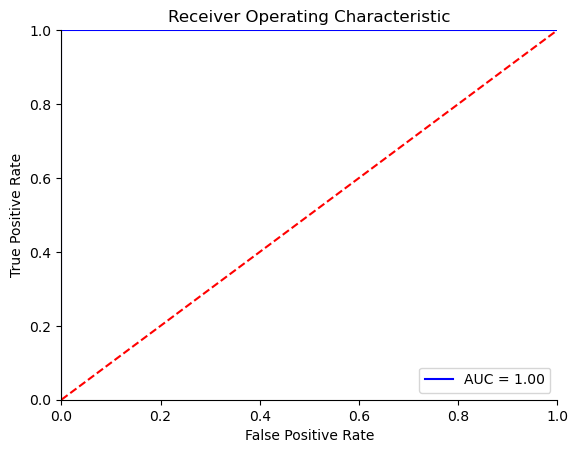

0.5


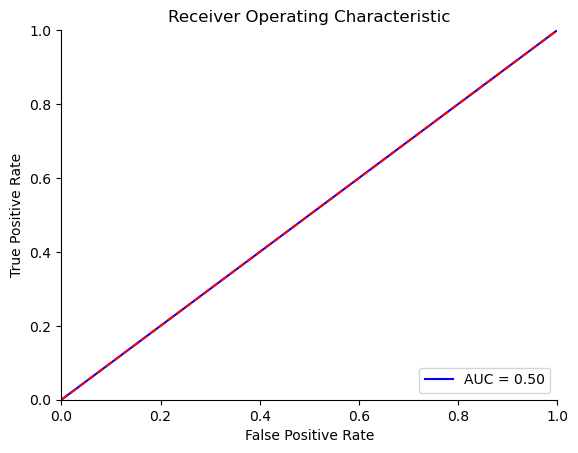

0.5


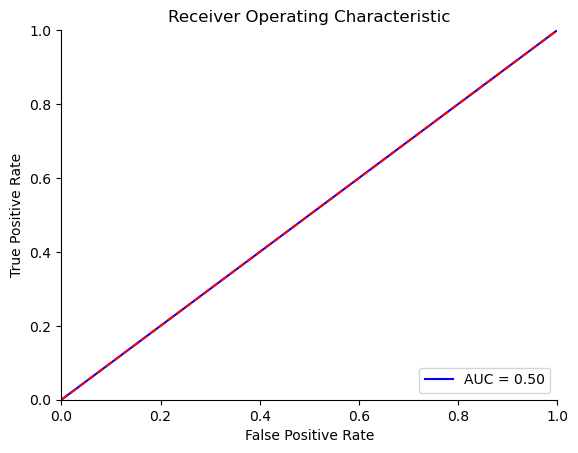

0.5


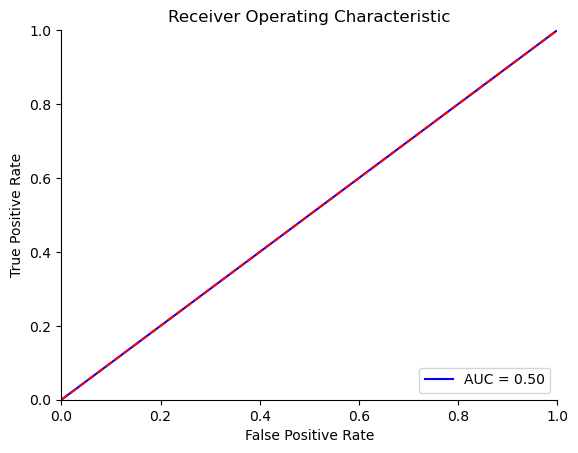

In [23]:
print(compute_auroc(df_test['churned'], df_test['churned']))
plot_auroc(df_test['churned'], df_test['churned'])
print(compute_auroc(df_test['churned'], alwaysChurn )) # Auroc if we always predict churn
plot_auroc(df_test['churned'], alwaysChurn )
print(compute_auroc(df_test['churned'], neverChurn)) # Auroc if we never predict churn
plot_auroc(df_test['churned'], neverChurn)
print(compute_auroc(df_test['churned'], meanChurn)) # Auroc if we predict the mean as probability of churning
plot_auroc(df_test['churned'], meanChurn)

The blue line means that the **proportion** of **correctly** classified churned samples is the same as the **proportion** of **incorrectly** classified samples which are not churned. 
https://youtu.be/4jRBRDbJemM?feature=shared&t=244


## Decision trees

One way to understand decision trees is by first manually creating a decision tree ourselves.

In [24]:
df_train.groupby("huidig_contractduur")['churned'].mean()

huidig_contractduur
12    0.504228
24    0.686469
36    0.388289
60    0.000000
99    0.000000
Name: churned, dtype: float64

In [25]:
def model1(row):
    if row.huidig_contractduur == 12:
        return 0.504228
    elif row.huidig_contractduur == 24:
        return 0.686469
    elif row.huidig_contractduur == 36:
        return 0.388289
    elif row.huidig_contractduur >=60:
        return 0
    else:
        return 0.410952 # Mean value across the whole dataset.

In [26]:
predictions1 = df_test.apply(model1, axis=1)
predictions1.head()

9098    0.504228
6899    0.504228
6961    0.504228
4411    0.388289
6574    0.504228
dtype: float64

In [27]:
predictions1.value_counts()

0.504228    1664
0.388289     755
0.000000     442
0.686469     121
Name: count, dtype: int64

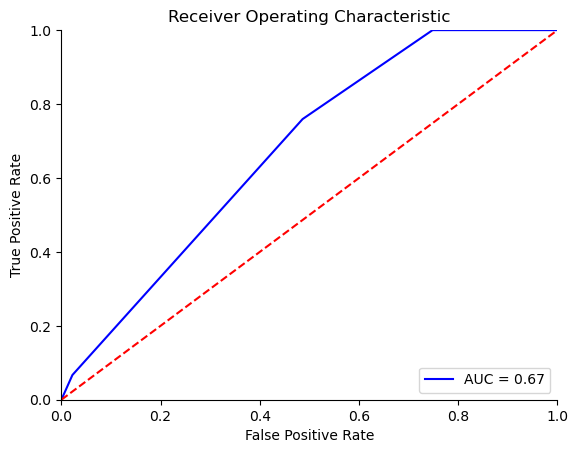

0.6746380157335186

In [28]:
plot_auroc(df_test['churned'], predictions1)
compute_auroc(df_test['churned'], predictions1)

The AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

An AUC of 0.67 would actually mean that lets say we take two data points belonging to separate classes then there is 67% chance model would be able to segregate them or rank order them correctly i.e positive point has a higher prediction probability than the negative class. AUC measures how well a model is able to distinguish between classes

Let's use the sklearn package:

In [29]:
featuresModel1 = ['huidig_contractduur'] 

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(df_train[featuresModel1], df_train['churned'])

DecisionTreeClassifier(max_depth=5)

In [31]:
def apply_model(model, features, validation_function = compute_auroc, print_to_screen = True, show_auroc = False):
    pred_tree_train = model.predict_proba(df_train[features])
    pred_tree_test = model.predict_proba(df_test[features])
    
    pred_churn_tree_train = pd.Series(map(lambda x: x[1], pred_tree_train))
    pred_churn_tree_test = pd.Series(map(lambda x: x[1], pred_tree_test))
    
    validation_result_train = validation_function(df_train['churned'], pred_churn_tree_train) 
    validation_result_test = validation_function(df_test['churned'], pred_churn_tree_test)
    
    if(print_to_screen):
        print( "Result on trainset:" )
        print( validation_result_train )
        print()
        print( "Result on testset:" )
        print( validation_result_test )
    if(show_auroc):
        plot_auroc(df_test['churned'], pred_churn_tree_test)
    
    return (validation_result_train, validation_result_test)

Result on trainset:
0.670982919179644

Result on testset:
0.6746380157335186


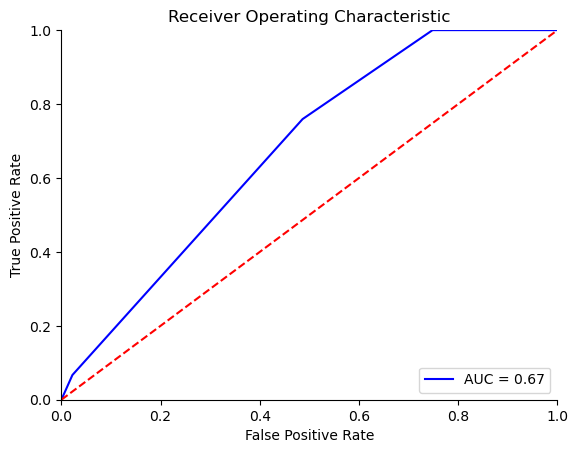

(0.670982919179644, 0.6746380157335186)

In [32]:
apply_model(dt, featuresModel1, show_auroc=True)

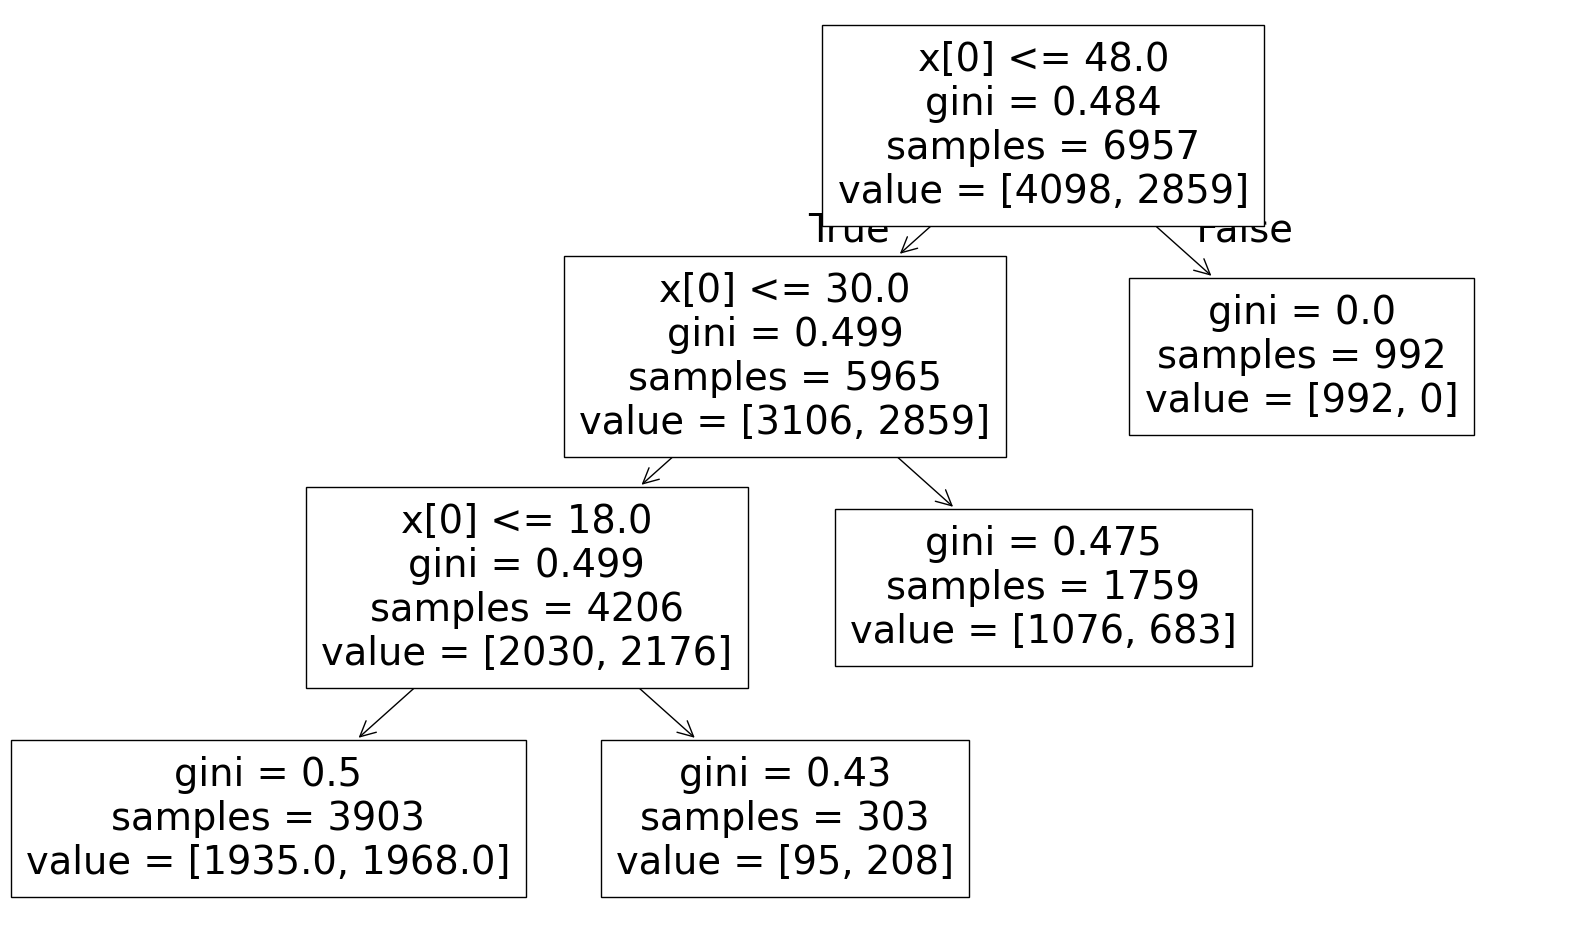

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plot_tree(dt)
plt.show()

We can also make a much prettier version! If you want to do this you'll need to install Graphviz. It can be installed through Anaconda with 
`conda install -c anaconda graphviz`  
`conda install -c anaconda python-graphviz`  
`conda install -c anaconda pydot`  
in the Anaconda prompt. If the code below still does not work, install from here: (https://graphviz.org/download/).

The code below plots the tree, but with column names instead of indices. You can also see what the prediction will be at each **leaf** (lowest nodes on the tree).
In this way you can really understand what the model has learned about the data set!

(It also stores a pdf with the full tree in the same directory as the notebook, called 'decision_tree.pdf'.)

In [34]:
from sklearn import tree
import graphviz

def plot_tree(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=['churned', 'not churned'],  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

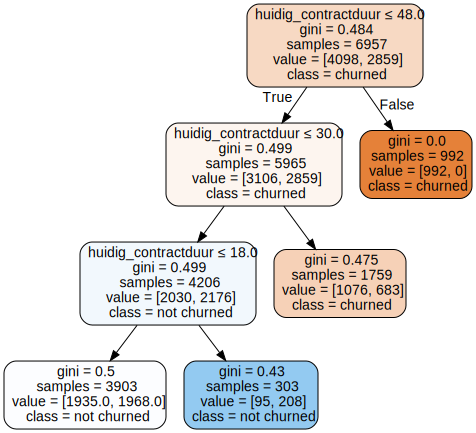

In [35]:
plot_tree(dt, featuresModel1)

## Overfitting

In [36]:
featuresModel2 = ['huidig_contractduur', 'VERBRUIKGAS']
dt2 = DecisionTreeClassifier()
dt2.fit(df_train[featuresModel2], df_train['churned'])

DecisionTreeClassifier()

In [37]:
apply_model(dt2, featuresModel2)

Result on trainset:
0.9619908601624658

Result on testset:
0.6037647199812715


(0.9619908601624658, 0.6037647199812715)

In [38]:
# It's best not to plot this tree because it's very big and takes a long time to plot.
# plot_tree(dt2, featuresModel2)

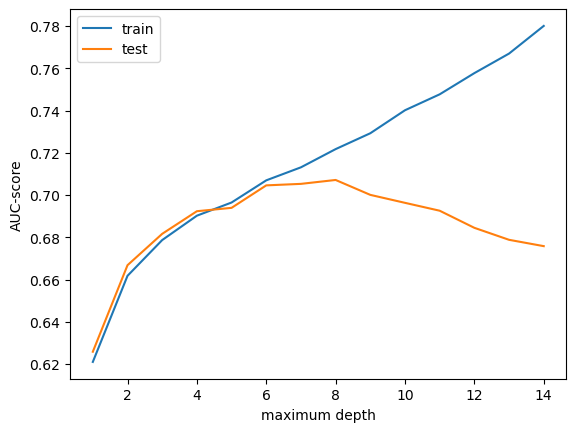

In [39]:
err_train = []
err_test = []
depths = range(1, 15)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(df_train[featuresModel2], df_train['churned'])
    err_train_i, err_test_i = apply_model(dt, featuresModel2, print_to_screen=False)
    err_train.append(err_train_i)
    err_test.append(err_test_i)
    
plt.plot(depths, err_train, label='train')
plt.plot(depths, err_test, label='test')
plt.legend()
plt.xlabel('maximum depth')
plt.ylabel('AUC-score')
plt.show()

In [40]:
dt3 = DecisionTreeClassifier(max_depth=6)
dt3.fit(df_train[featuresModel2], df_train['churned'])

DecisionTreeClassifier(max_depth=6)

In [41]:
apply_model(dt3, featuresModel2)

Result on trainset:
0.7069653748977269

Result on testset:
0.7045866049563928


(0.7069653748977269, 0.7045866049563928)

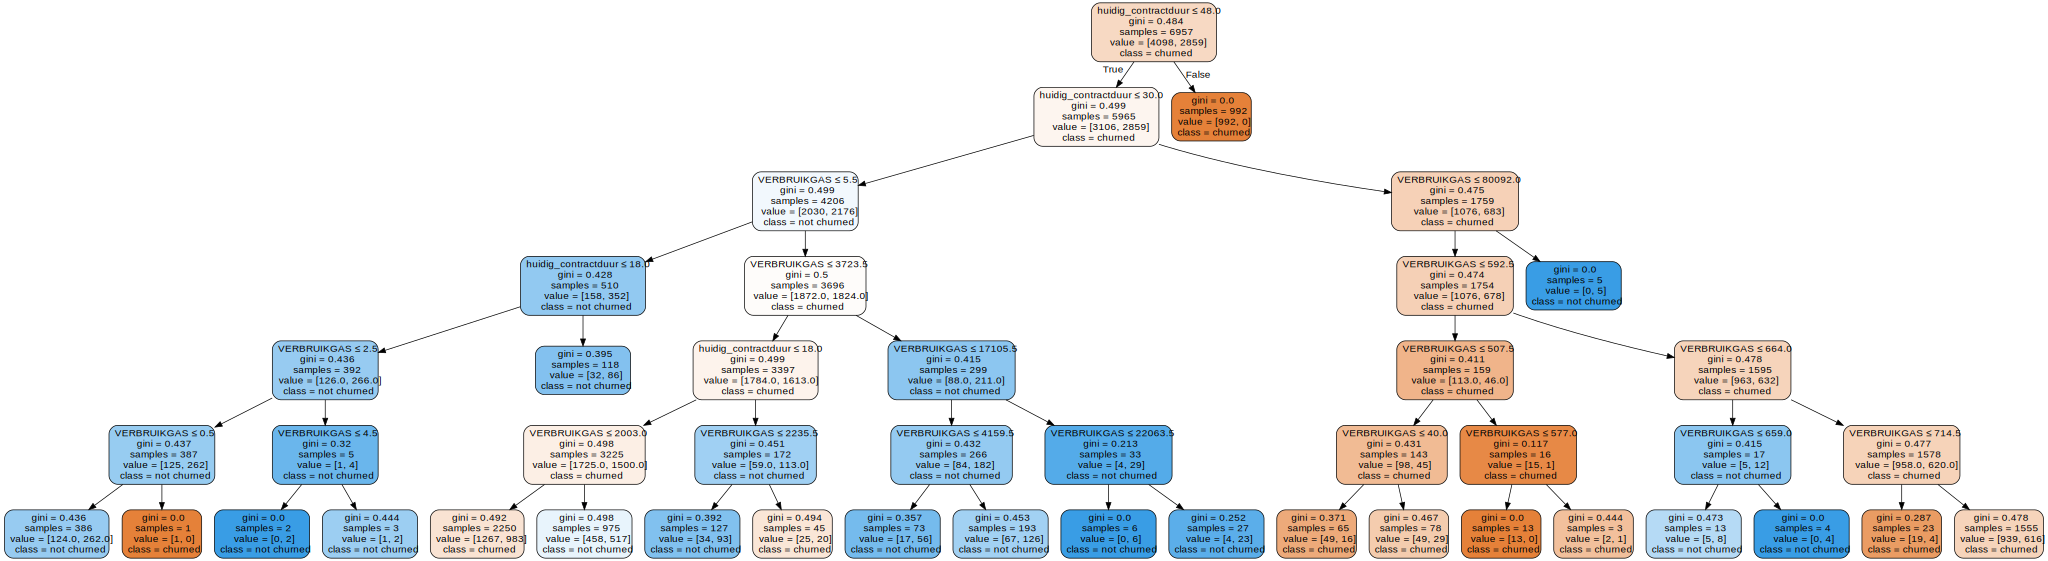

In [42]:
plot_tree(dt3, featuresModel2)

## Decision trees summary

Pro:
- Human readable and easy to understand
- The training algorithm scales very well with the number of rows and number of features. Time complexity for building a decision tree is `O(#rows*log(#rows)*#features)`.

Con:
- Prone to overfitting. Limit the depth of the tree (or prune the tree) to mitigate this issue.
- Can not learn as complex hypotheses as more advanced models like Neural Networks and Random Forests

## Random forests

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)

Result on trainset:
0.8026686936068423

Result on testset:
0.8004415994381416


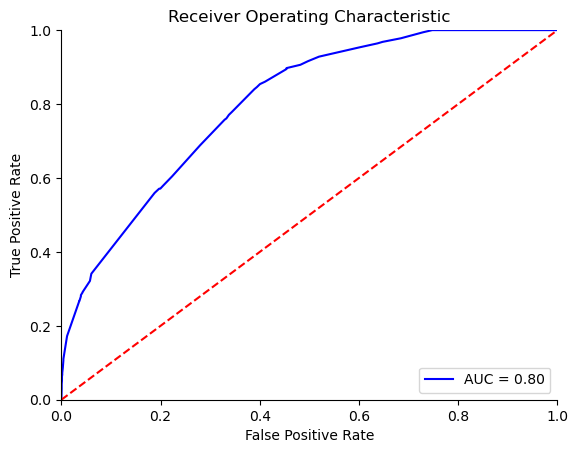

(0.8026686936068423, 0.8004415994381416)

In [43]:
from sklearn.ensemble import RandomForestClassifier

featuresModelRF = ['huidig_contractduur', 'Door 2 Door', 'Inbound', 'Online', 'Prijsvergelijker',
       'Speciale sales acties', 'Telemarketing', 'vaste_prijs', 'groene_stroom'] 
forest = RandomForestClassifier(n_estimators=200, random_state = 123)
forest.fit(df_train[featuresModelRF], df_train['churned'])

apply_model(forest, featuresModelRF, show_auroc=True)

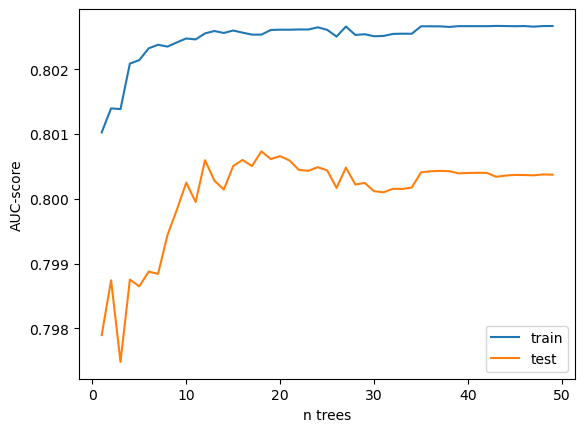

In [44]:
AUC_train = []
AUC_test = []
n_trees = range(1, 50)

for n_tree in n_trees:
    rf = RandomForestClassifier(n_estimators=n_tree, random_state = 123)
    rf.fit(df_train[featuresModelRF], df_train['churned'])
    AUC_train_i, AUC_test_i = apply_model(rf, featuresModelRF, print_to_screen=False)
    AUC_train.append(AUC_train_i)
    AUC_test.append(AUC_test_i)
    
plt.plot(n_trees, AUC_train, label='train')
plt.plot(n_trees, AUC_test, label='test')
plt.legend()
plt.xlabel('n trees')
plt.ylabel('AUC-score')
plt.show()

In [45]:
forest.feature_importances_

array([0.66202906, 0.02404669, 0.0075789 , 0.01429681, 0.02482483,
       0.03103036, 0.02009746, 0.12078736, 0.09530852])

Feature ranking:
1. feature 0 huidig_contractduur (0.662029)
2. feature 7 Door 2 Door (0.120787)
3. feature 8 Inbound (0.095309)
4. feature 5 Online (0.031030)
5. feature 4 Prijsvergelijker (0.024825)
6. feature 1 Speciale sales acties (0.024047)
7. feature 6 Telemarketing (0.020097)
8. feature 3 vaste_prijs (0.014297)
9. feature 2 groene_stroom (0.007579)


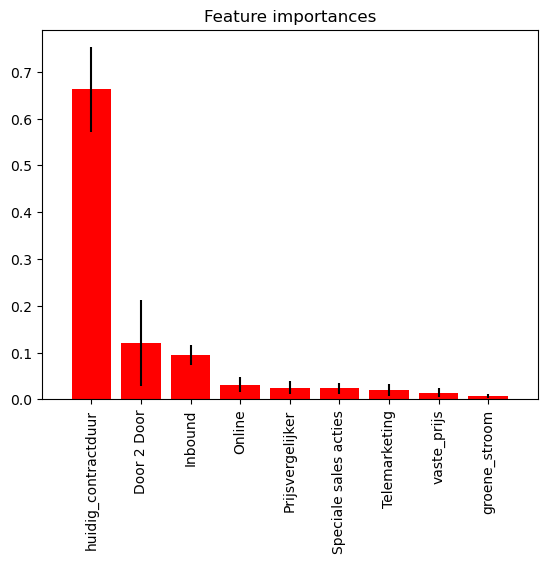

In [46]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = pd.Series(featuresModelRF)

# Print the feature ranking
print("Feature ranking:")

index_features=[]
for f in range(len(featuresModelRF)):
    index_features.append(f)
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], features[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(featuresModelRF)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(featuresModelRF)), features[index_features], rotation = 90)
plt.xlim([-1, len(featuresModelRF)])
plt.show()

## Random forest summary:

Pro:
- Can learn complex hypotheses compared to models like decision trees, linear and logistic regression
- Can rank features based on important. Can be used for feature selection.
- Does not need a test set to be evaluated. Can use [Out Of Bag error](https://stackoverflow.com/questions/18541923/what-is-out-of-bag-error-in-random-forests) instead. 
- The training algorithm scales very well with the number of rows and number of features. Time complexity for building a random forest is `O(#rows*log(#rows)*#features*#trees)`.

Con:
- Loses the readability and interpretability that decision trees have.

## Task
- Finish your univariate and bivariate analysis on Titanic mini-project.
- **Split the data into a train and test set.**
- Choose an evaluation metric.
- Create a decision tree with the train set and evaluate the model with the test set.
- Create a random forest with the train set and evaluate the model with the test set.
- Present (a summary) of your results at the end of the day.